## Model training 

In [1]:
# going to use svm  for this model trining first scale this datasets

In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
##  del df, x,x_df,x_test,x_train,x_train_df,y,y_pred,y_pred_optimal_threshold,y_prob,y_test,y_train

In [130]:
df = pd.read_csv("diabetes_clean.csv")

In [131]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [132]:
y = df.iloc[:,-1]

In [133]:
x = df.drop("Outcome" , axis=1)

In [134]:
x.drop("Unnamed: 0" , axis=1,inplace =True)

In [135]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [136]:
(df ==0).sum()

Unnamed: 0                    1
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [137]:
df.drop("Unnamed: 0" , axis=1,inplace=True)

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20 , random_state= 30)

In [139]:
x_train,x_test,y_train,y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 352            3     61.0           82.0           28.0    125.0  34.4   
 129            0    105.0           84.0           29.0    125.0  27.9   
 387            8    105.0          100.0           36.0    125.0  43.3   
 244            2    146.0           76.0           35.0    194.0  38.2   
 366            6    124.0           72.0           29.0    125.0  27.6   
 ..           ...      ...            ...            ...      ...   ...   
 145            0    102.0           75.0           23.0    125.0  32.3   
 763           10    101.0           76.0           48.0    180.0  32.9   
 140            3    128.0           78.0           29.0    125.0  21.1   
 500            2    117.0           90.0           19.0     71.0  25.2   
 421            2     94.0           68.0           18.0     76.0  26.0   
 
      DiabetesPedigreeFunction  Age  
 352                     0.243   46  
 129                  

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [141]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [221]:
## now implementaion of the svc
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [222]:
svc = SVC(class_weight= "balanced",probability=True,decision_function_shape='ovr')
log = LogisticRegression(penalty=['l1' , 'l2'], class_weight= "balanced")

In [223]:
param  = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10 ,50,100],
    'decision_function_shape': ['ovr', 'ovo']
}


In [224]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [228]:
grid = GridSearchCV(svc , param_grid = param ,scoring='accuracy', refit= True,cv=cv,verbose=3)

In [229]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.1, decision_function_shape=ovr, kernel=linear;, score=0.732 total time=   0.1s
[CV 2/5] END C=0.1, decision_function_shape=ovr, kernel=linear;, score=0.805 total time=   0.0s
[CV 3/5] END C=0.1, decision_function_shape=ovr, kernel=linear;, score=0.699 total time=   0.0s
[CV 4/5] END C=0.1, decision_function_shape=ovr, kernel=linear;, score=0.740 total time=   0.0s
[CV 5/5] END C=0.1, decision_function_shape=ovr, kernel=linear;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.1, decision_function_shape=ovr, kernel=rbf;, score=0.724 total time=   0.0s
[CV 2/5] END C=0.1, decision_function_shape=ovr, kernel=rbf;, score=0.748 total time=   0.0s
[CV 3/5] END C=0.1, decision_function_shape=ovr, kernel=rbf;, score=0.683 total time=   0.0s
[CV 4/5] END C=0.1, decision_function_shape=ovr, kernel=rbf;, score=0.683 total time=   0.0s
[CV 5/5] END C=0.1, decision_function_shape=ovr, kernel=rbf;, score=0.713 total time= 

,estimator,SVC(class_wei...bability=True)
,param_grid,"{'C': [0.1, 1, ...], 'decision_function_shape': ['ovr', 'ovo'], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [148]:
grid.best_params_


{'C': 0.1, 'decision_function_shape': 'ovr', 'kernel': 'linear'}

In [173]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True)


In [149]:
y_pred = grid.predict(x_test)

In [174]:
from sklearn.metrics import classification_report ,confusion_matrix ,accuracy_score

In [175]:
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7857142857142857
[[84 20]
 [13 37]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       104
           1       0.65      0.74      0.69        50

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154



In [176]:
from sklearn.metrics import roc_curve,roc_auc_score

In [179]:
y_prob = best_model.predict_proba(x_test)[:, 1]

In [180]:
y_prob

array([0.11064804, 0.14348363, 0.14622483, 0.56432725, 0.13347083,
       0.05414241, 0.65158632, 0.20553306, 0.35554522, 0.04460349,
       0.0937845 , 0.17881812, 0.13629164, 0.23237572, 0.0901287 ,
       0.08544268, 0.24642597, 0.21825521, 0.82123878, 0.12141554,
       0.44122029, 0.82588236, 0.48495314, 0.28101365, 0.96220388,
       0.42459591, 0.0905359 , 0.05088316, 0.04738447, 0.34289628,
       0.19567652, 0.34178667, 0.45554027, 0.68461196, 0.02229456,
       0.16900223, 0.1996644 , 0.81245764, 0.73990049, 0.11313264,
       0.12754275, 0.61540993, 0.08524153, 0.44446093, 0.67731537,
       0.86305521, 0.60203359, 0.47520637, 0.04744198, 0.0375004 ,
       0.04218848, 0.25773096, 0.25307477, 0.77045674, 0.35496613,
       0.51689078, 0.51362546, 0.17715019, 0.15304642, 0.04113695,
       0.1301956 , 0.07877269, 0.7632052 , 0.2322571 , 0.25063975,
       0.17473112, 0.89709357, 0.8804645 , 0.56197096, 0.0541672 ,
       0.33319013, 0.77033995, 0.29174832, 0.40592596, 0.19649

In [181]:
## model accur useing  roc auc curve is 
model_auc=roc_auc_score(y_test,y_prob)
print(model_auc)

0.8483653846153847


In [182]:
## now ploting roc curve 
fpr,tpr,threshold = roc_curve(y_test ,y_prob)

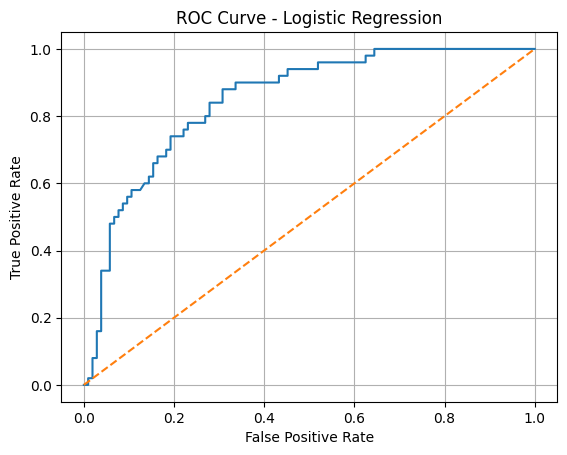

In [183]:
plt.plot(fpr,tpr)
plt.grid()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()



In [184]:
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)

best_threshold = threshold[best_idx]
best_tpr = tpr[best_idx]
best_fpr = fpr[best_idx]

print("Best Threshold:", best_threshold)
print("TPR (Recall):", best_tpr)
print("FPR:", best_fpr)

Best Threshold: 0.25307476929003314
TPR (Recall): 0.88
FPR: 0.3076923076923077


In [187]:
y_pred_optimal_threshold = (y_prob > best_threshold).astype(int)

In [188]:
y_pred_optimal_threshold

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [189]:
print("\nOPTIMAL THRESHOLD")
print("-------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_optimal_threshold))
print("-------------------------------------------------------")
print(confusion_matrix( y_pred_optimal_threshold,y_test))
print("-------------------------------------------------------")
print(classification_report(y_test,y_pred_optimal_threshold))


OPTIMAL THRESHOLD
-------------------------------------------------------
Accuracy: 0.7467532467532467
-------------------------------------------------------
[[72  7]
 [32 43]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       104
           1       0.57      0.86      0.69        50

    accuracy                           0.75       154
   macro avg       0.74      0.78      0.74       154
weighted avg       0.80      0.75      0.75       154



In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [191]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [192]:
len(df)

768

In [193]:
## with defult thresshold 
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7857142857142857
[[84 20]
 [13 37]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       104
           1       0.65      0.74      0.69        50

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154



In [194]:
x_df = pd.DataFrame(x , columns= df.columns)
x_df.drop("Outcome" , axis=1,inplace=True)
x_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54


In [216]:
def predict_diabetes_with_threshold(model, scaler, threshold=best_threshold): ## threshold is set by the domain expert 

    user_input = np.array([[5, 148, 29, 35, 100, 50.6, 0.627, 50]])
    user_input_scaled = scaler.transform(user_input)

    prob = model.predict_proba(user_input_scaled)[0][1]
    prediction = 1 if prob >= threshold else 0

    print(f"Probability: {prob:.2f}")
    print("Diabetic" if prediction == 1 else "Non-Diabetic")

In [217]:
predict_diabetes_threshold(best_model,scaler)

Probability: 0.93
Diabetic


## Although SVM gave decent accuracy, I rejected it because it produced higher false negatives, which is unacceptable in medical diagnosis

Only 768 rows

Many zero / missing-like values (Glucose, Insulin, BP = 0)

SVM is very sensitive to noise & outliers